# Coursework 1: Image filtering

In this coursework we will explore some basic image filters used in computer vision. The corresponding lectures are Lectures 3 and 4 on image filtering and edge detection.

What to do?

* The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are supposed to implement.

* First, run `jupyter-lab` or `jupyter-notebook` in the terminal to start the Jupyter notebook.

* Then, complete and run the code to get the results.

* Finally, please export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and answers, and upload the pdf file onto Cate.

Dependencies:

* If you work on a college computer in the Computer Lab, where Ubuntu 18.04 is installed by default, you can use the following virtual environment for your work, where required Python packages are already installed.

`source /vol/bitbucket/wbai/virt/computer_vision_2020/bin/activate`

When you no longer need the virtual environment, you can exit it by running `deactivate`.

* If you work on your own laptop using either Anaconda or plain Python, you can install new packages (such as numpy, imageio etc) running `conda install [package_name]` or `pip3 install [package_name]` in the terminal.




In [42]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

### 1. Moving average filter. (20 points)

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3, 5x5 and 9x9 respectively. Apply the filter to the input image, show the filtering results and comment on the results.

Design the kernel of the filter by yourself. Then, 2D image filtering can be performed using the function `scipy.signal.convolve2d()`.

Image dimension = (1800, 2400)


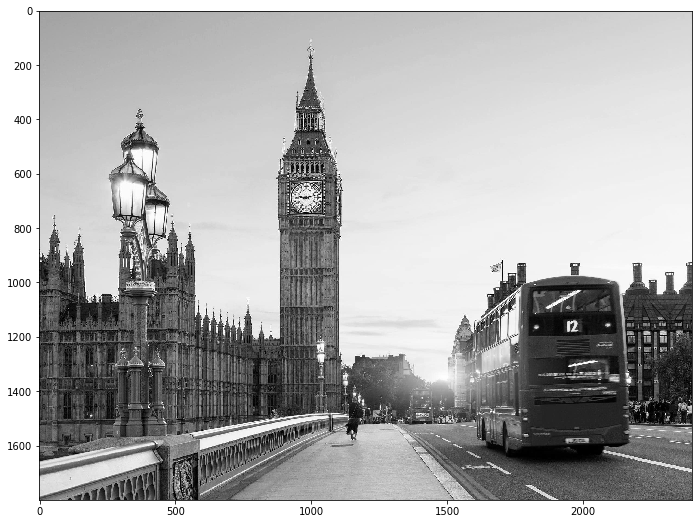

In [43]:
# Read the image (provided)
image = imageio.imread('london.jpg')
print('Image dimension =', image.shape)
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(12, 9)

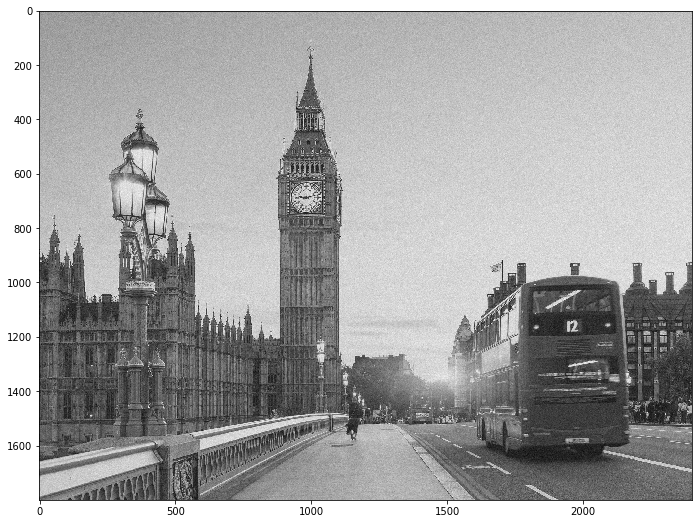

In [44]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(12, 9)

**Note: from now on, please use the noisy image as the input for the filters.**

### 1.1 Filter the noisy image with a 3x3 moving average filter. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


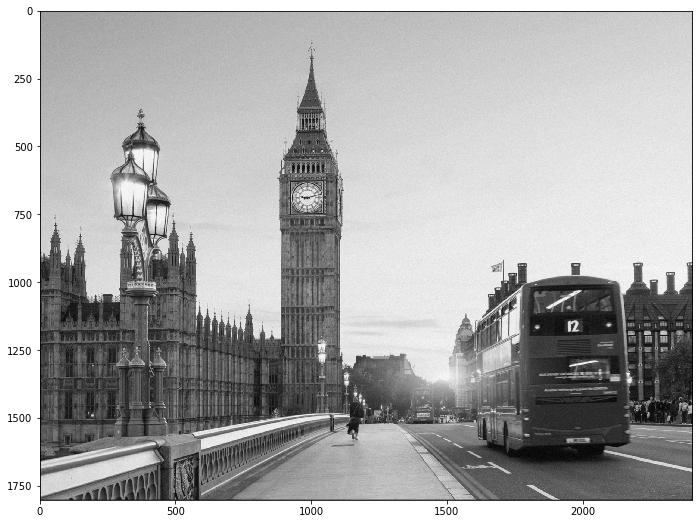

In [45]:
# Design the filter h
shape = (3, 3)
h = np.ones(shape)
h = np.divide(h, 9)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 1.2 Filter the noisy image with a 5x5 moving average filter. (5 points)

Filter h:
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


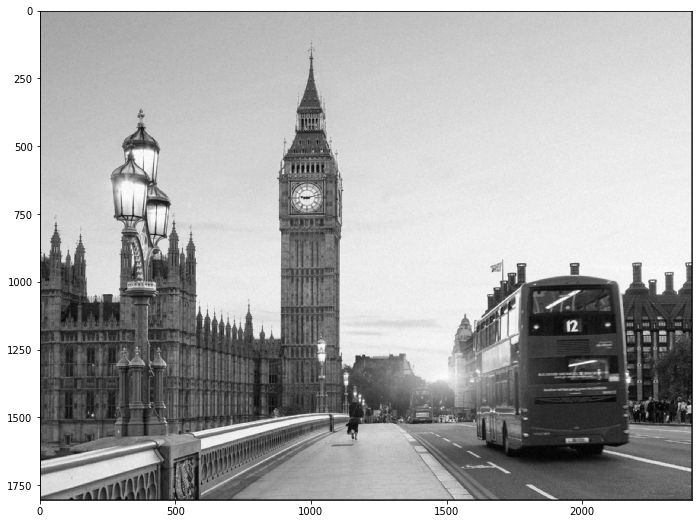

In [5]:
# Design the filter h
shape = (5, 5)
h = np.ones(shape)
h = np.divide(h, 25)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 1.3 Filter the noisy image with a 9x9 moving average filter. (5 points)

Filter h:
[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


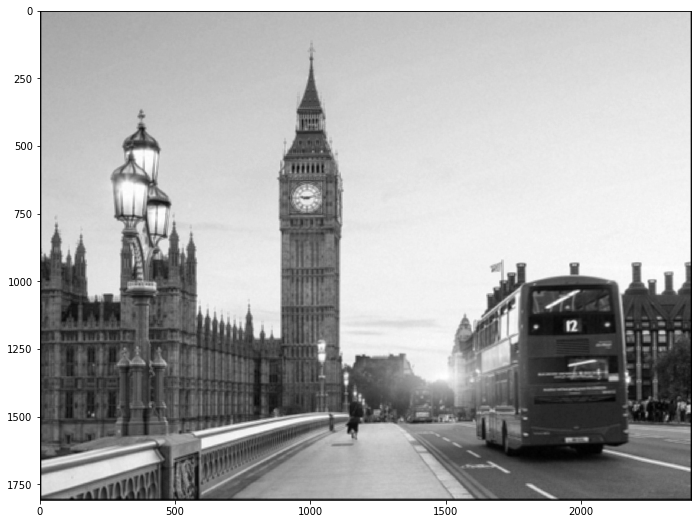

In [6]:
# Design the filter h
shape = (9, 9)
h = np.ones(shape)
h = np.divide(h, 81)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 1.4 Comment on the filtering results. How do different kernel sizes influence the filtering results? (5 points)

The filtering results show that the larger the kernel size, the smoother the filtering becomes. The image feels less granulated and more smooth/'foggy' as more pixels are considerd for every filtering.  

### 2. Edge detection. (45 points)

Perform edge detection using Sobel filters, as well as Gaussian + Sobel filters. Display the magnitude image of the Sobel filtering result and comment.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image. (5 points)

h_sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
h_sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


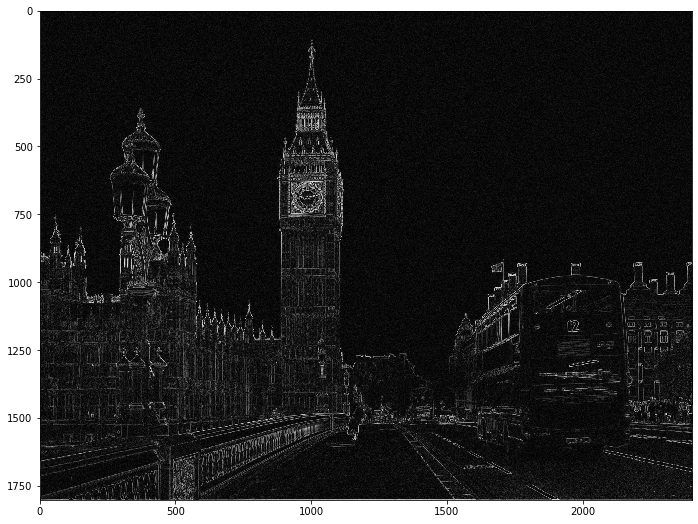

In [7]:
# Design the Sobel filters
h_sobel_y = np.array([[1, 2, 1], 
                      [0, 0, 0], 
                      [-1, -2, -1]])
h_sobel_x = h_sobel_y.T

# Sobel filtering
#  Discontinuity along x-axis
x_axis_sobel = scipy.signal.convolve2d(image_noisy, h_sobel_x)
# Discontinuity along y-axis
y_axis_sobel = scipy.signal.convolve2d(image_noisy, h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.sqrt(x_axis_sobel**2 + y_axis_sobel**2)

# Print the filters (provided)
print('h_sobel_x:')
print(h_sobel_x)
print('h_sobel_y:')
print(h_sobel_y)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray')
plt.gcf().set_size_inches(12, 9)

### 2.2 Design a 2D Gaussian filter. (8 points)

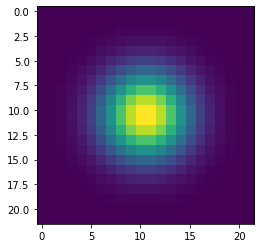

In [8]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # Setting up array
    i = 0
    j = 0
    row = 2*(int(np.ceil(3.5 * sigma)))
    # Note: square -> row == column
    h = np.empty([row,row ], dtype = float)
    
    # Considering from [-3.5 * sigma, 3.5 * sigma]
    for x in np.arange(-3.5 * sigma, 3.5 * sigma + 1, 1.0):
        for y in np.arange(-3.5 * sigma, 3.5 * sigma + 1, 1.0):
            h[i][j] = (1/(2*np.pi*sigma**2))*(np.exp(-(x**2+y**2)/(2*sigma**2)))
            j += 1
            j = j % row
        i += 1
        i = i % row
    return h

#Display the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Sobel filtering. (5 points)

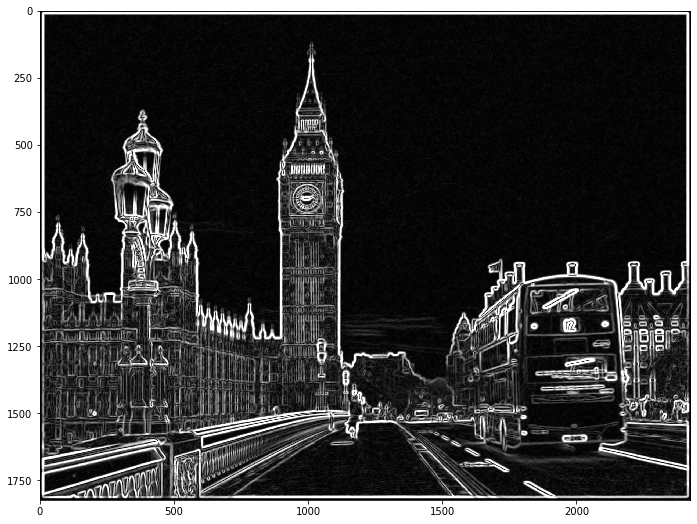

In [9]:
# Perform Gaussian smoothing before Sobel filtering
# Generating a Gaussian filter for sigma = 3
gaussian_filtering = scipy.signal.convolve2d(image_noisy, h)

# Sobel filtering
# Discontinuity along x-axis
x_axis_sobel = scipy.signal.convolve2d(gaussian_filtering, h_sobel_x)
# Discontinuity along y-axis
y_axis_sobel = scipy.signal.convolve2d(gaussian_filtering, h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.sqrt(x_axis_sobel**2 + y_axis_sobel**2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(12, 9)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels), followed by Sobel filtering. Evaluate the computational time for Gaussian smoothing. (7 points)

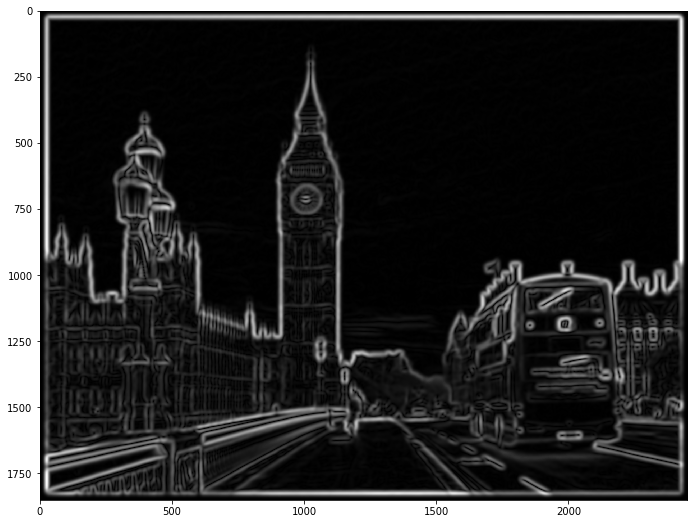

In [15]:
# Create the Gaussian filter
h = gaussian_filter_2d(7)

# Perform Gaussian smoothing
gaussian_filtering = scipy.signal.convolve2d(image_noisy, h)

# Sobel filtering
# Discontinuity along x-axis
x_axis_sobel = scipy.signal.convolve2d(gaussian_filtering, h_sobel_x)
# Discontinuity along y-axis
y_axis_sobel = scipy.signal.convolve2d(gaussian_filtering, h_sobel_y)


# Calculate the gradient magnitude
sobel_mag = np.sqrt(x_axis_sobel**2 + y_axis_sobel**2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(12, 9)

### 2.5 Design 1D Gaussian filters along x-axis and y-axis respectively. (8 points)

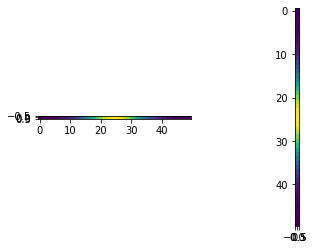

In [19]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # Setting up array
    i = 0
    row = 2*(int(np.ceil(3.5 * sigma)))
    # Empty 1D array pf floats
    h = np.empty([1, row], dtype = float)
    # Considering from [-3.5 * sigma, 3.5 * sigma]
    for x in np.arange(-3.5 * sigma, 3.5 * sigma + 1, 1.0):
        h[0][i]= (1/(np.sqrt(2*np.pi)*sigma))*(np.exp(-(x**2)/(2*sigma**2)))
        i += 1
        i = i % row
    return h

# sigma = 7 pixel (provided)
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = h_x.T

# Display the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing (sigma = 7 pixels) using two separable filters, then apply the Sobel filters. Evaluate the computational time for separable Gaussian filtering. (7 points)

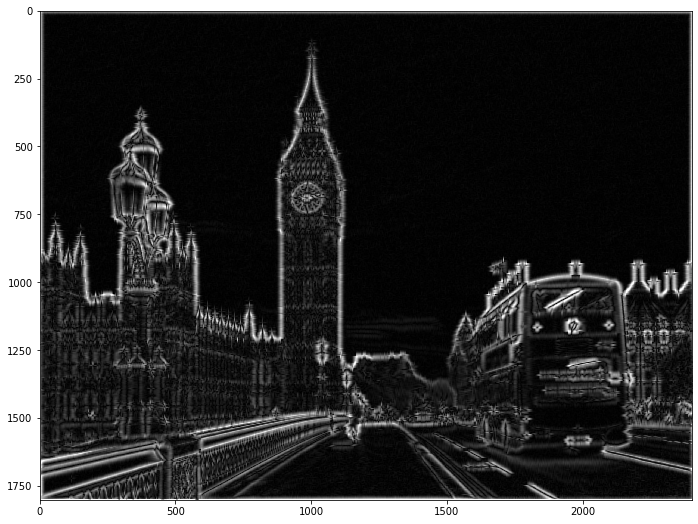

In [30]:
# Perform separable Gaussian smoothing before Sobel filtering
gaussian_1D_x = scipy.signal.convolve2d(image_noisy, h_x, mode = "same")
gaussian_1D_y = scipy.signal.convolve2d(image_noisy, h_y, mode = "same")

# Sobel filtering
# Discontinuity along x-axis
x_axis_sobel = scipy.signal.convolve2d(gaussian_1D_x, h_sobel_x)

# Discontinuity along y-axis
y_axis_sobel = scipy.signal.convolve2d(gaussian_1D_y, h_sobel_y)

# Calculate the gradient magnitude
sobel_mag = np.sqrt(x_axis_sobel**2 + y_axis_sobel**2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(12, 9)

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time. (5 points)

Gaussian filter makes the image more blurry: the larger the sigma, the more blurry the edges are in the image.
Soble filter makes only the edges in the image visible.All the other content becomes black.
The computational time increases significantly as the sigma (in the Gaussian smoothing) increases.

### 3. Laplacian filter. (20 points)

Perform Laplacian filtering and Laplacian of Gaussian filtering. Display the results and comment.

### 3.1 Implement a 3x3 Laplacian filter. (5 points)

h:
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


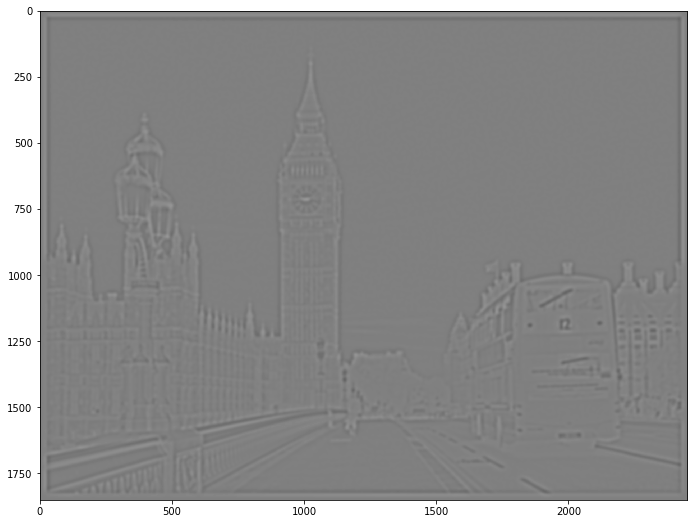

In [34]:
# Design the filter
h = np.array([[0, 1, 0], 
              [1, -4, 1], 
              [0, 1, 0]])

# Laplacian filtering
lap = scipy.signal.convolve2d(gaussian_filtering, h, mode='same')

# Print the filter (provided)
print('h:')
print(h)

# Display the filtering result (provided)
plt.imshow(lap, cmap='gray', vmin=-10, vmax=10)
plt.gcf().set_size_inches(12, 9)

### 3.2 Implement the Laplacian of Gaussian filter ($\sigma$ = 3 pixel). (10 points)

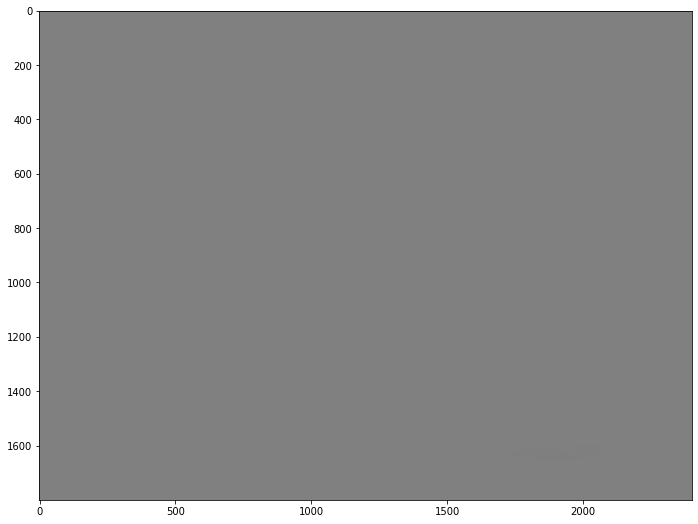

In [38]:
# Design the Gaussian filters
# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(3)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = h_x.T

# Gaussian smoothing
gaussian_1D_x = scipy.signal.convolve2d(image_noisy, h_x, mode='same')
gaussian_1D_y = scipy.signal.convolve2d(image_noisy, h_y, mode='same')

# Design the Laplacian filter
def log(x, y, sigma):
    return (-(1/(np.pi*sigma**4))*(1 - ((x**2 + y**2)/(2*sigma**2))))*np.exp(-(x**2 + y**2)/(2*sigma**2))

# Laplacian filtering
lap = log(gaussian_1D_x, gaussian_1D_y, sigma)

# Display the filtering result (provided)
plt.imshow(lap, cmap='gray', vmin=-10, vmax=10)
plt.gcf().set_size_inches(12, 9)

### 3.3 Comments on the filtering results. (5 points)

DO THIS PART


### 4. Exploration: Implement the 3x3 moving average filter using Pytorch. (15 points)

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [76]:
# Import libaries (provided)
import torch

### 4.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (5 points)

In [77]:
# Expand the dimension of the numpy array
width = image_noisy.shape[0]
height = image_noisy.shape[1]

converted_4d = np.empty([1, 1, width, height], dtype= float)
converted_4d[0][0] = image_noisy

# Convert to a Pytorch tensor using torch.from_numpy
pytorched = torch.from_numpy(converted_4d)

### 4.2 Create a Pytorch Conv2D filter, set its kernel to be a 3x3 moving averaging filter. (5 points)

In [80]:
# Create the Conv2D filter (provided)
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)

# Set the kernel weight
#conv.weight = torch.nn.Parameter(pytorched)

AttributeError: 'Conv2d' object has no attribute 'shape'

### 4.3 Apply the filter to the noisy image tensor and display the output image. (5 points)

In [75]:
# Filtering
image_filtered = scipy.signal.convolve2d(image_noisy, conv, mode='same')

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(12, 9)

ValueError: convolve2d inputs must both be 2D arrays

### 5. Survey: How many hours does it take you to complete the coursework?

In [ ]:
Around four hours